# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
data_shape = df_data.shape
col_num = data_shape[1]
row_num = data_shape[0]
col_names = df_data.columns
# IS NA ?
print(f"Is NaN values? {df_data.isna().values.any()}")
#IS Duplicates?
print(f"Is duplicates? {df_data.duplicated().values.any()}")

Is NaN values? True
Is duplicates? False


In [8]:
print(f"Data Frame shape: {data_shape}")
print(f"Number of columns: {col_num}")
print(f"Number of rows: {row_num}")
print(f"Column names: {col_names}")

Data Frame shape: (4324, 9)
Number of columns: 9
Number of rows: 4324
Column names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [9]:
df_data=df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], axis=1)

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [10]:
launch_counts = df_data['Organisation'].value_counts().reset_index()
launch_counts.columns = ['Organisation', 'Launch Count']

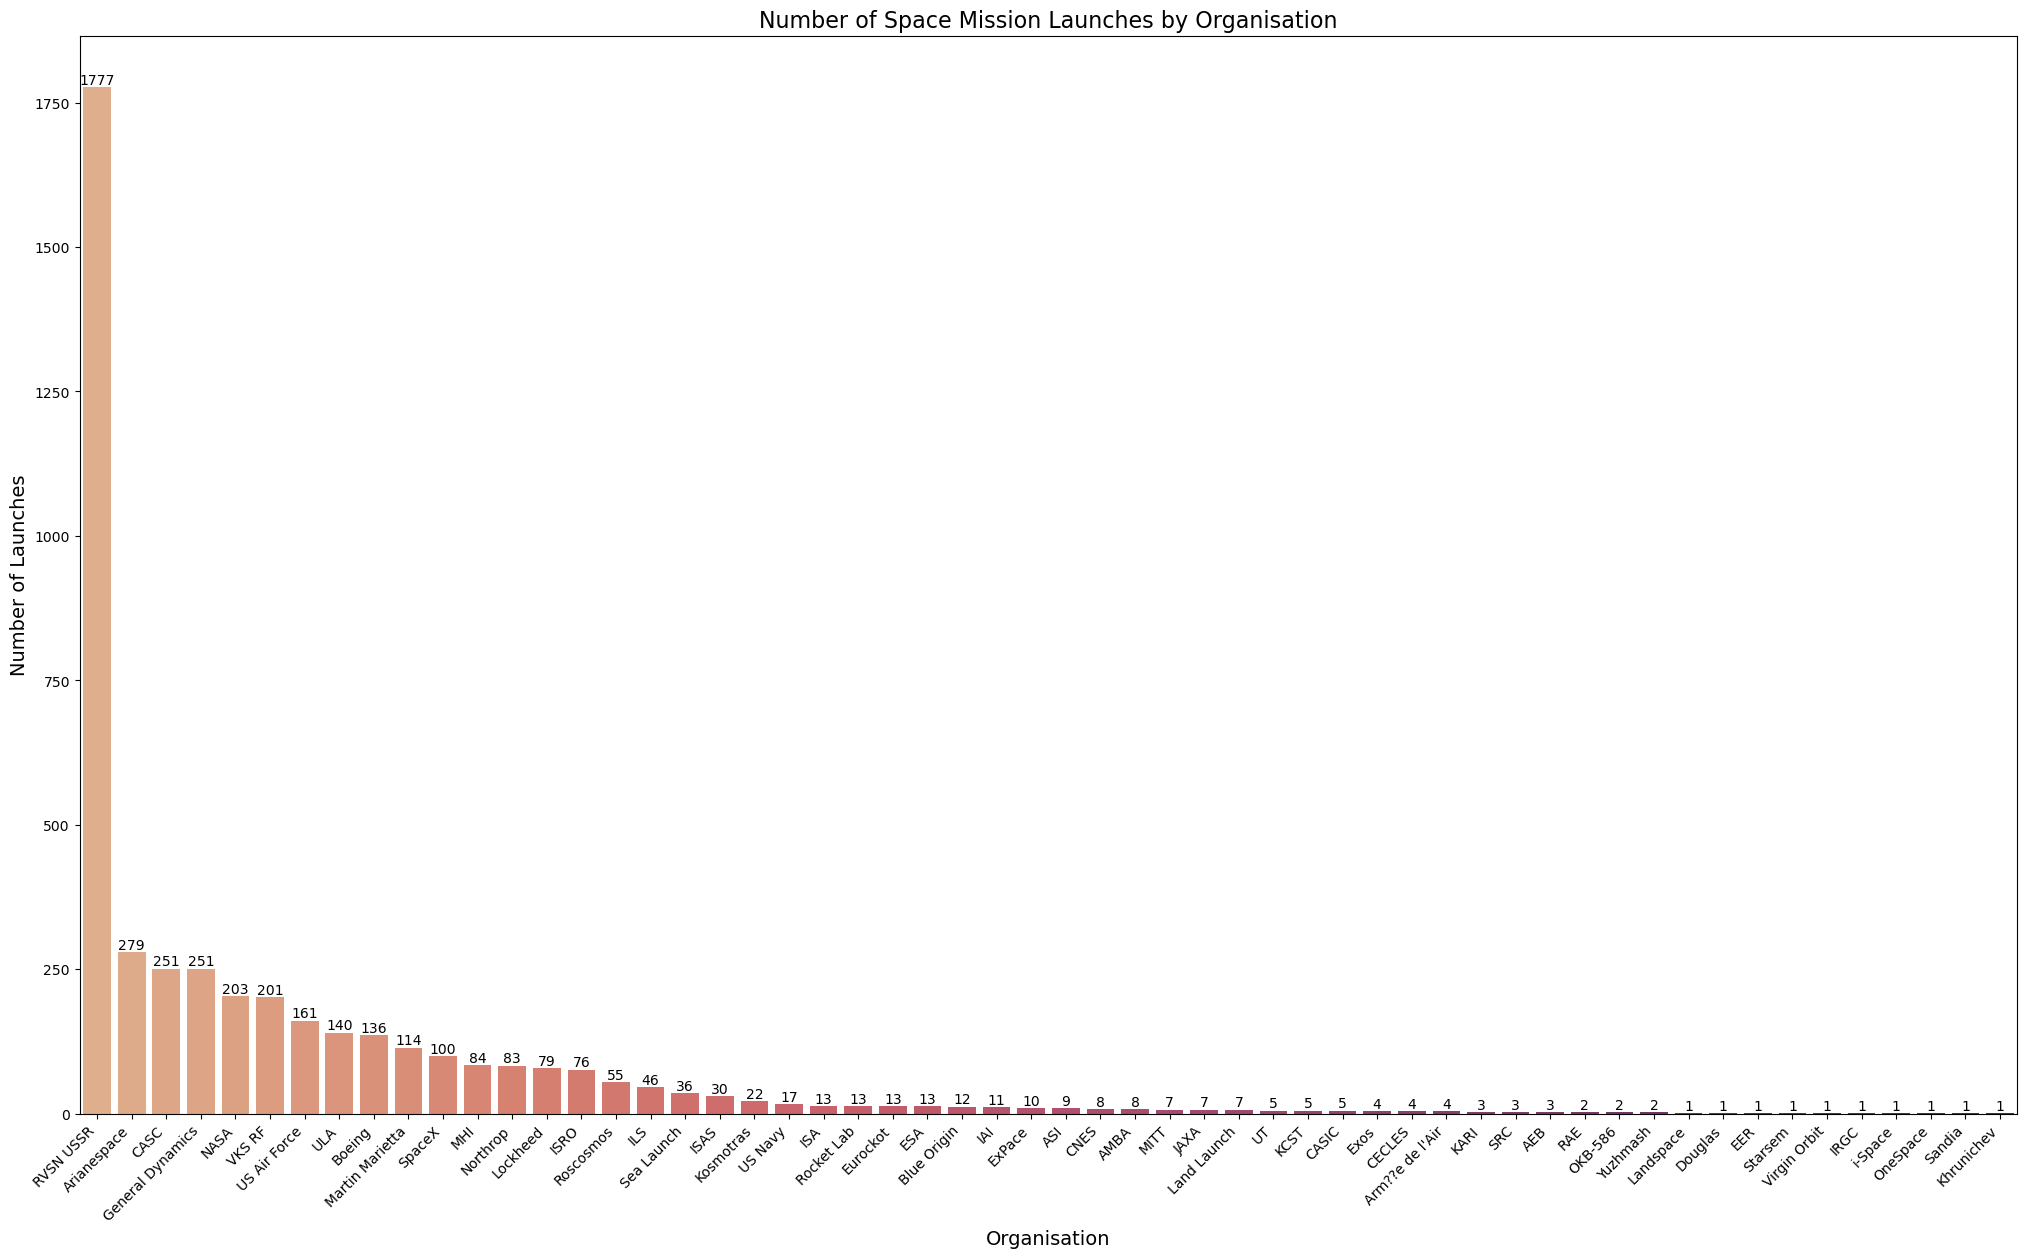

In [11]:
fig, ax = plt.subplots(figsize=(25, 14))
sns.barplot(data=launch_counts, x="Organisation", y="Launch Count", ax=ax, palette="flare")
ax.set_title("Number of Space Mission Launches by Organisation", fontsize=16)
ax.set_xlabel("Organisation", fontsize=14)
ax.set_ylabel("Number of Launches", fontsize=14)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45, ha='right')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

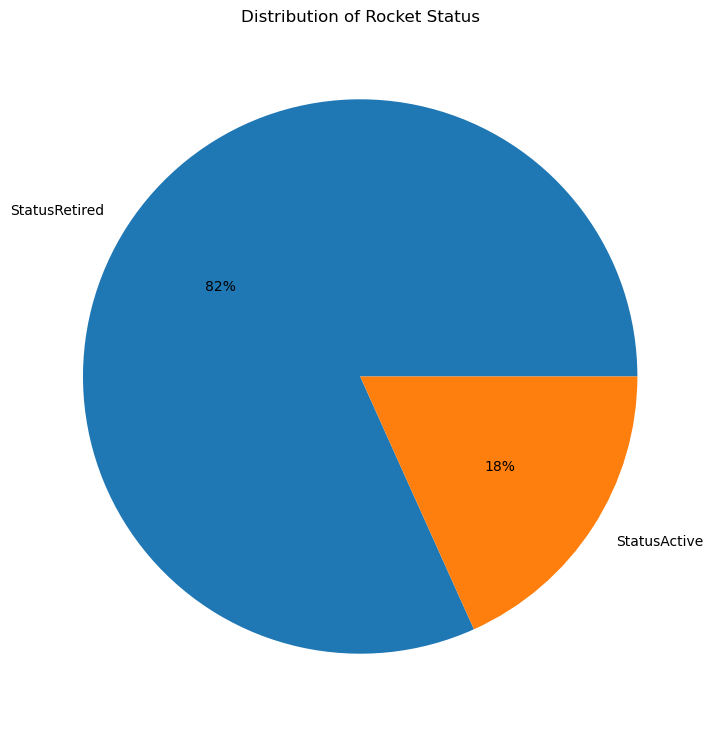

In [12]:
rocket_counts = df_data['Rocket_Status'].value_counts()

fig, ax = plt.subplots(figsize=(18, 9))
ax.pie(rocket_counts, labels=rocket_counts.index, autopct='%.0f%%')
ax.set_title("Distribution of Rocket Status")
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

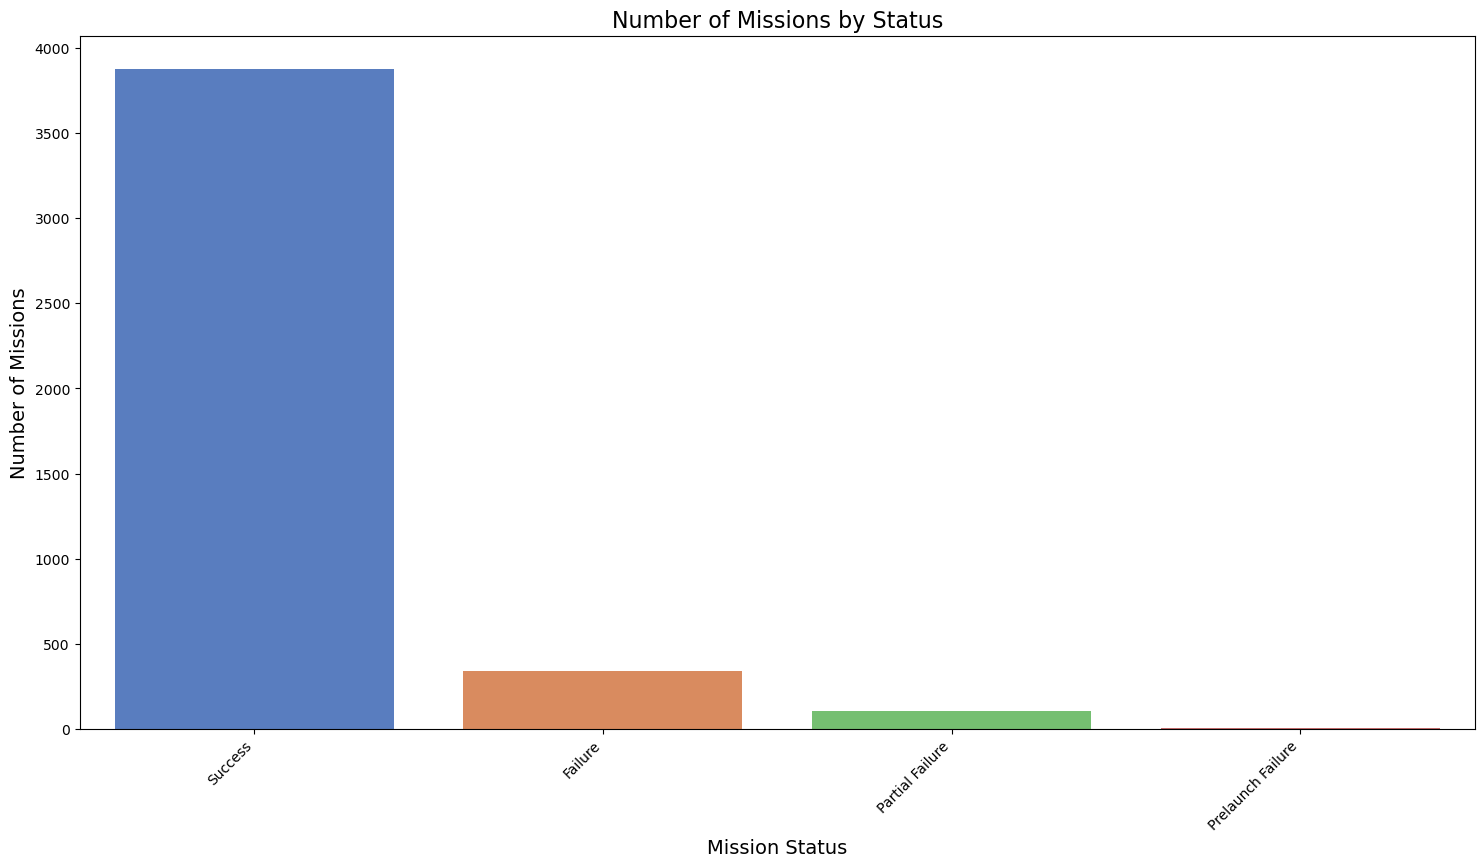

In [13]:
mission_count = df_data['Mission_Status'].value_counts().reset_index()
mission_count.columns = ['Mission_Status', 'Count']

fig, ax = plt.subplots(figsize=(18, 9))

sns.barplot(data=mission_count, x='Mission_Status', y='Count', ax=ax, palette='muted')
ax.set_title("Number of Missions by Status", fontsize=16)
ax.set_xlabel("Mission Status", fontsize=14)
ax.set_ylabel("Number of Missions", fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

In [14]:
df_data['Price'] = df_data['Price'].str.replace(',', '').astype(float)
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

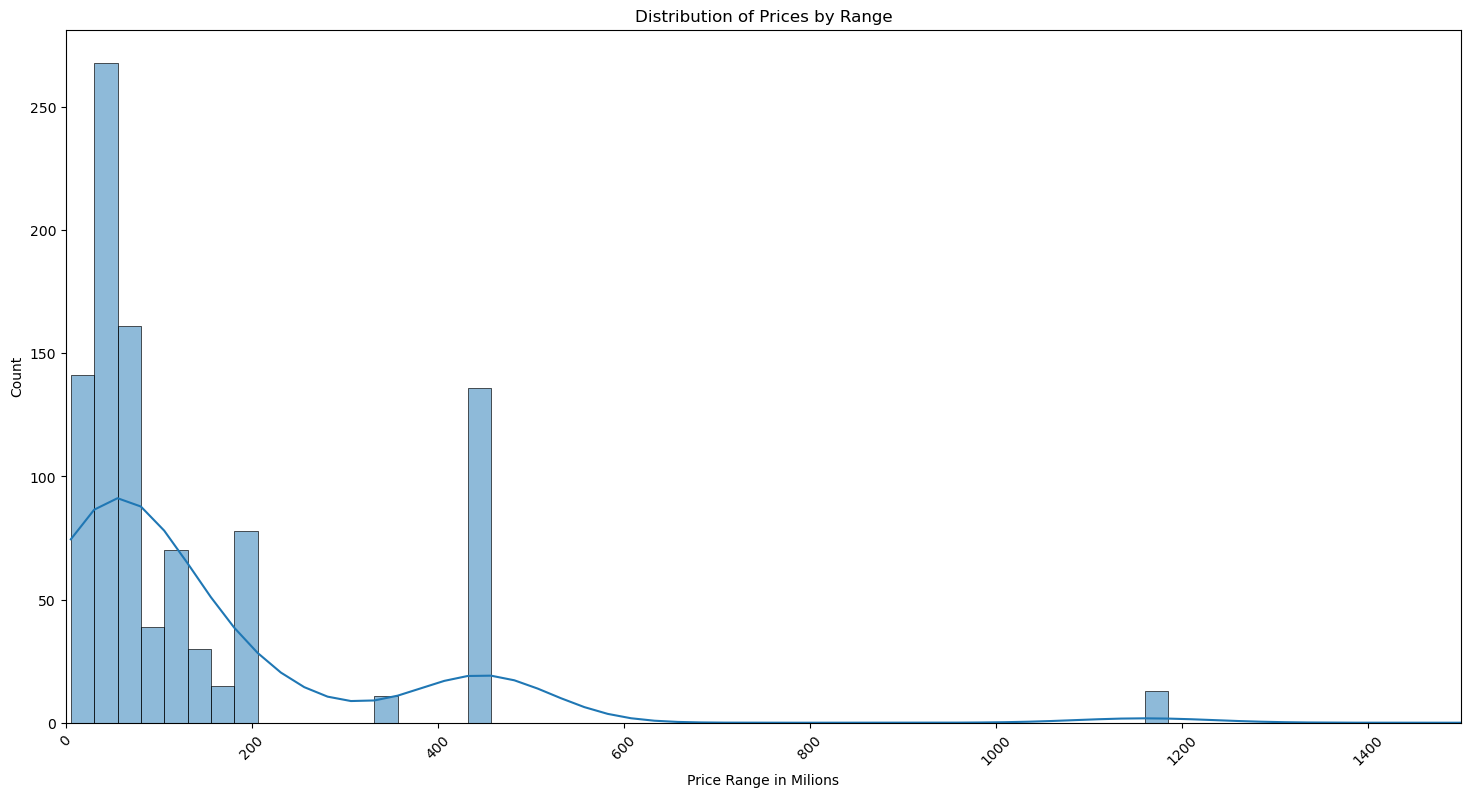

In [15]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.histplot(x=df_data['Price'].dropna().sort_values(),ax=ax, palette="Set2", kde=True)
ax.set_xlabel("Price Range in Milions")
ax.set_ylabel("Count")
ax.set_title("Distribution of Prices by Range")
plt.xticks(rotation=45)
plt.xlim(0,1500)


plt.show()


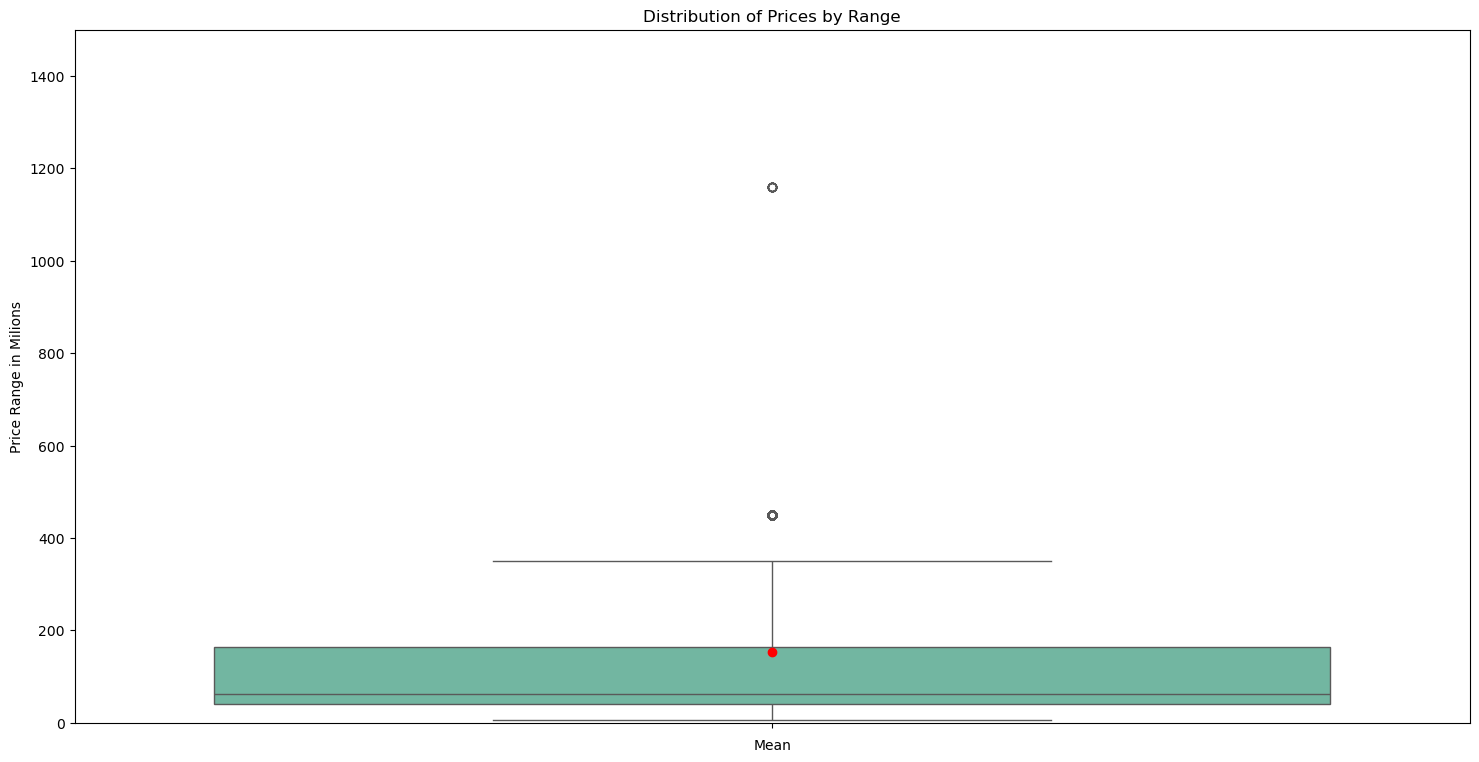

In [16]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.boxplot(y=df_data['Price'].dropna().sort_values(),ax=ax, palette="Set2",showmeans=True, meanprops={'marker':'o',
                                                                                                       'markerfacecolor':'red',
                                                                                                       'markeredgecolor':'red'})
ax.set_ylabel("Price Range in Milions")
ax.set_xlabel("Mean")
ax.set_title("Distribution of Prices by Range")
plt.xticks(rotation=45)
plt.ylim(0,1500)
#plt.yticks([0,500, 1000,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000])


plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [17]:
df_data['Location'] = df_data['Location'].str.replace('Russia', 'Russian Federation', regex=False)
df_data['Location'] = df_data['Location'].str.replace('New Mexico', 'USA', regex=False)
df_data['Location'] = df_data['Location'].str.replace('Yellow Sea', 'China', regex=False)
df_data['Location'] = df_data['Location'].str.replace('Shahrud Missile Test Site', 'Iran', regex=False)
df_data['Location'] = df_data['Location'].str.replace('Pacific Missile Range Facility', 'USA', regex=False)
df_data['Location'] = df_data['Location'].str.replace('Barents Sea', 'Russian Federation', regex=False)
df_data['Location'] = df_data['Location'].str.replace('Gran Canaria', 'USA', regex=False)

df_data['Country'] = df_data['Location'].str.extract(r'([A-Za-z\s]+)$')


In [18]:
country_launch = df_data['Country'].value_counts().reset_index()
country_launch.columns=['Country','Count']

In [19]:
fig = px.choropleth(
    country_launch, 
    locations="Country",  
    locationmode="country names",  
    color="Count",  
    hover_name="Country",
    color_continuous_scale="Viridis",  
    title="Launches by Country"
)

fig.update_layout(
    width=1000,   
    height=500    
)

fig.update_geos(showcoastlines=True)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [20]:
failure_data = df_data[df_data['Mission_Status'] == 'Failure']
country_fail = failure_data['Country'].value_counts().reset_index()
country_fail.columns = ['Country', 'Count']

In [21]:
fig = px.choropleth(
    country_fail, 
    locations="Country",  
    locationmode="country names",  
    color="Count",  
    hover_name="Country",
    color_continuous_scale="Viridis",  
    title="Failures by Country"
)

fig.update_layout(
    width=1000,   
    height=500    
)

fig.update_geos(showcoastlines=True)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [22]:
fig=px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status']
)

fig.update_layout(
    width=1200,   
    height=700    
)

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

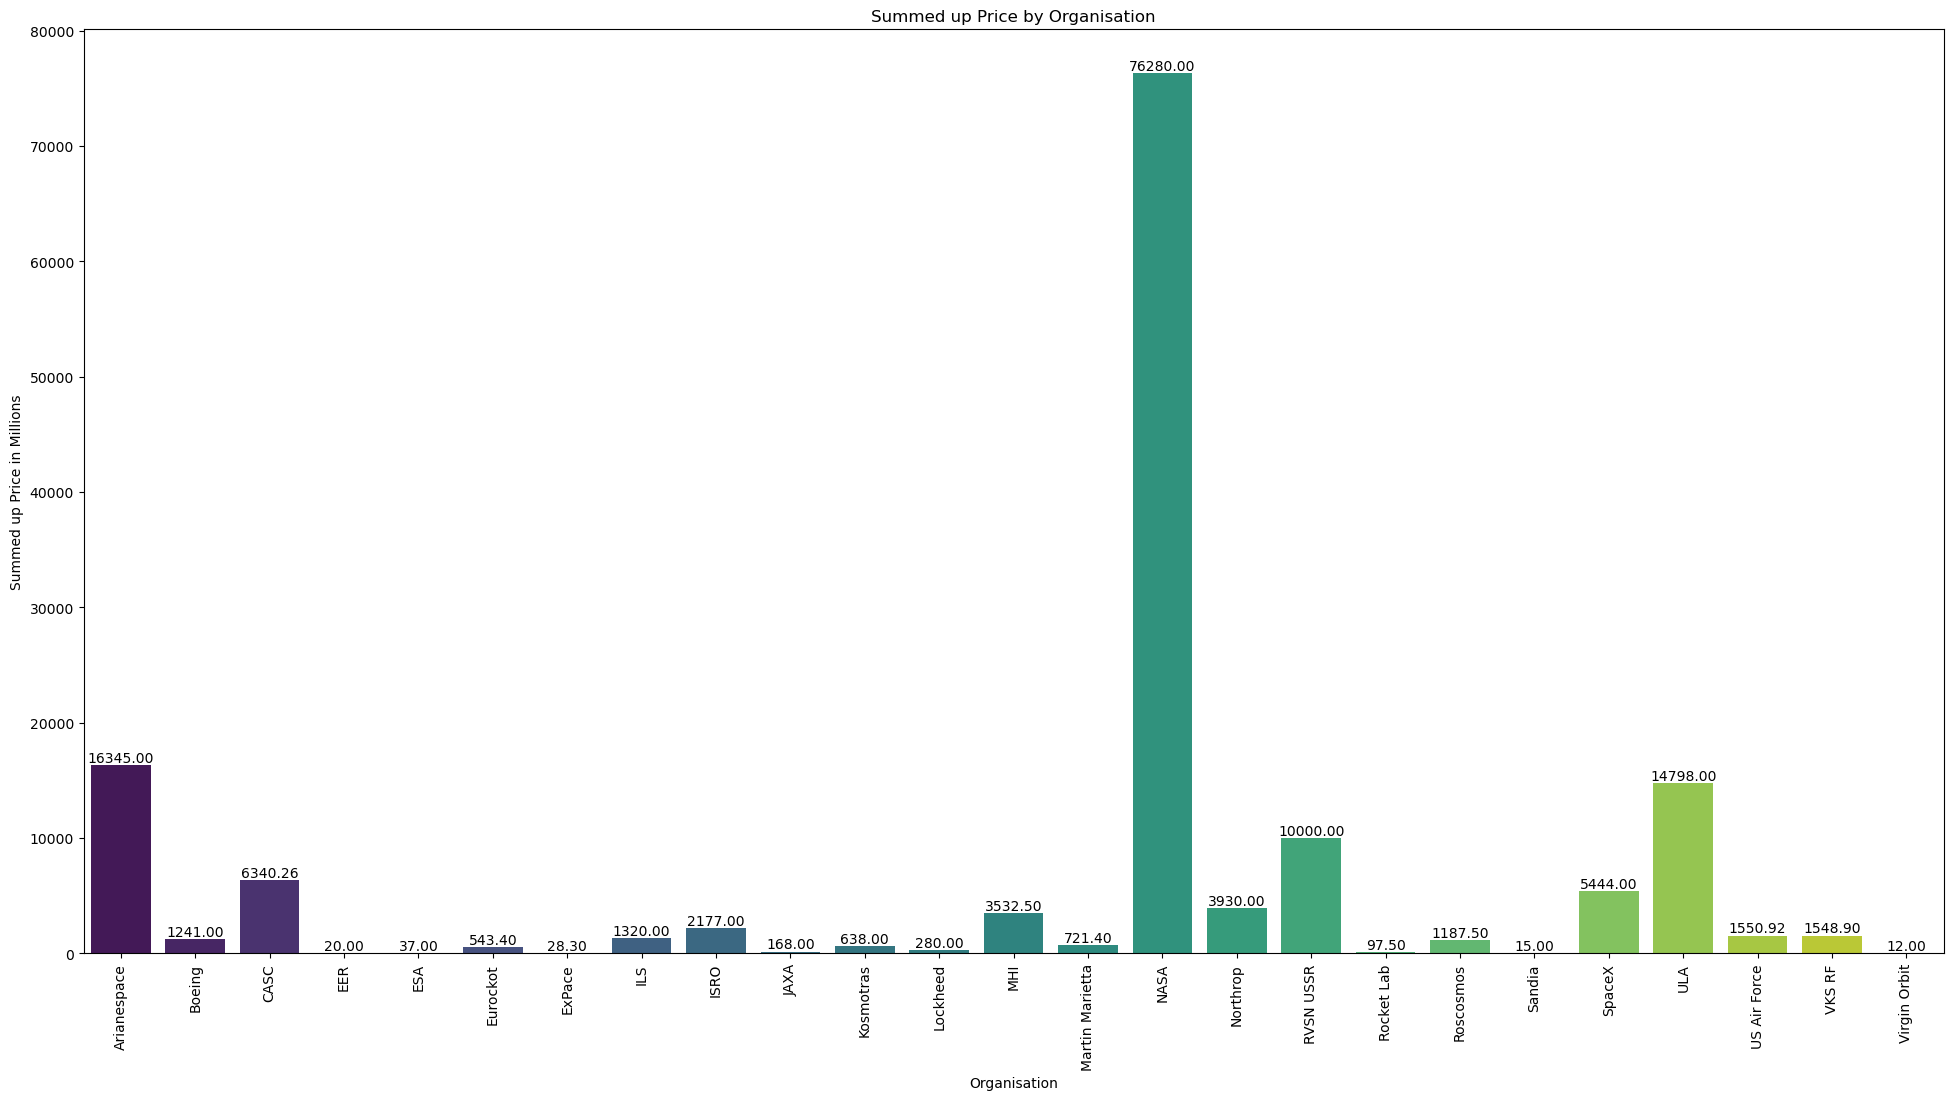

Organisation     Price
0       Arianespace 16,345.00
1            Boeing  1,241.00
2              CASC  6,340.26
3               EER     20.00
4               ESA     37.00
5          Eurockot    543.40
6            ExPace     28.30
7               ILS  1,320.00
8              ISRO  2,177.00
9              JAXA    168.00
10        Kosmotras    638.00
11         Lockheed    280.00
12              MHI  3,532.50
13  Martin Marietta    721.40
14             NASA 76,280.00
15         Northrop  3,930.00
16        RVSN USSR 10,000.00
17       Rocket Lab     97.50
18        Roscosmos  1,187.50
19           Sandia     15.00
20           SpaceX  5,444.00
21              ULA 14,798.00
22     US Air Force  1,550.92
23           VKS RF  1,548.90
24     Virgin Orbit     12.00

In [51]:
mean_prices = df_data.dropna(subset=['Price']).groupby('Organisation')['Price'].sum().reset_index()

fig, ax = plt.subplots(figsize=(24, 12))
sns.barplot(data=mean_prices, x='Organisation', y='Price', ax=ax, palette="viridis")

ax.set_ylabel("Summed up Price in Millions")
ax.set_xlabel("Organisation")
ax.set_title("Summed up Price by Organisation")
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  

plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [57]:
mean_prices['Count'] = df_data.dropna(subset=['Price']).groupby('Organisation').size().values
mean_prices['Money per Launch'] = mean_prices.Price/mean_prices.Count

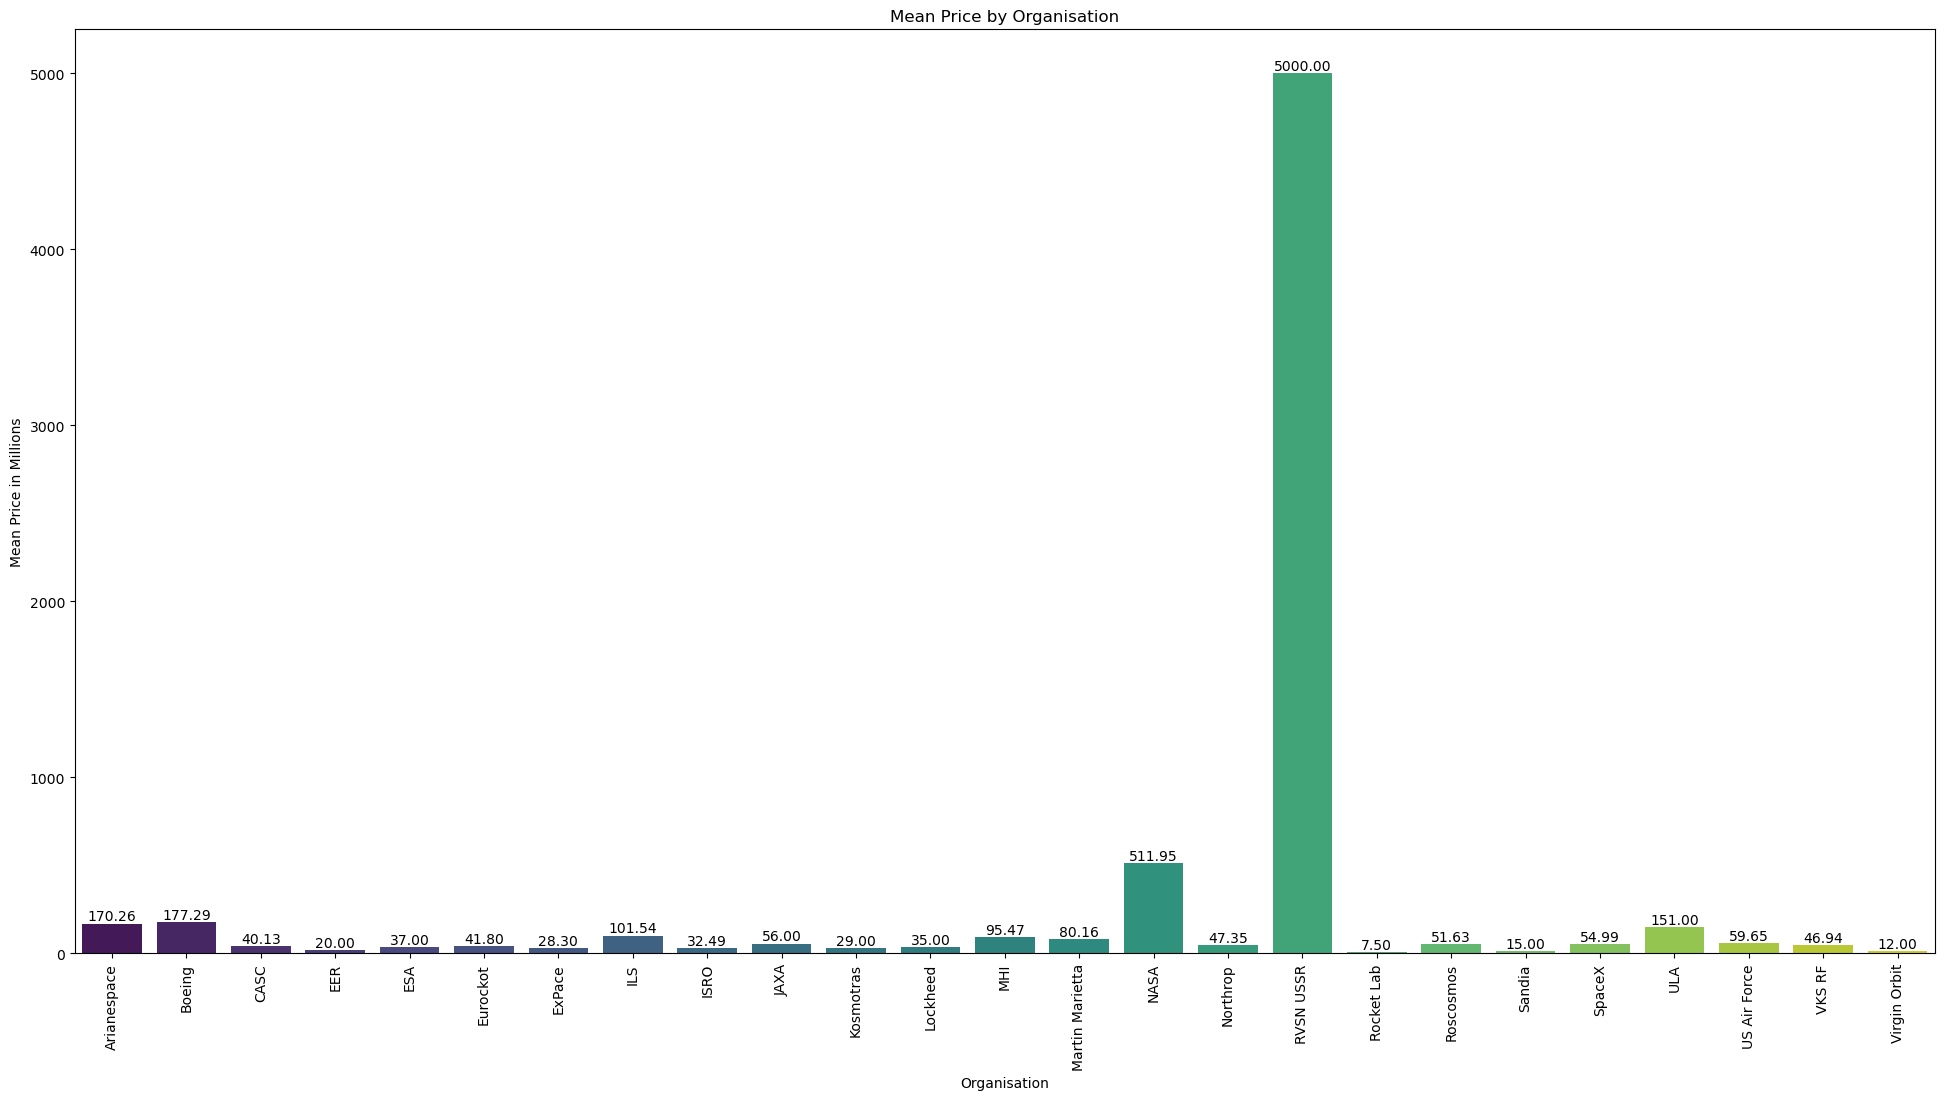

In [25]:
fig, ax = plt.subplots(figsize=(24, 12))
sns.barplot(data=mean_prices, x='Organisation', y='Money per Launch', ax=ax, palette="viridis")

ax.set_ylabel("Mean Price in Millions")
ax.set_xlabel("Organisation")
ax.set_title("Mean Price by Organisation")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.xticks(rotation=90)

  

plt.show()


### Difference between Mean Price Chart and Summed up Price Chart springs from lack of price data about USSR missions

# Chart the Number of Launches per Year

In [26]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
dates_data = df_data.groupby(df_data['Date'].dt.year).size().reset_index(name='Count')

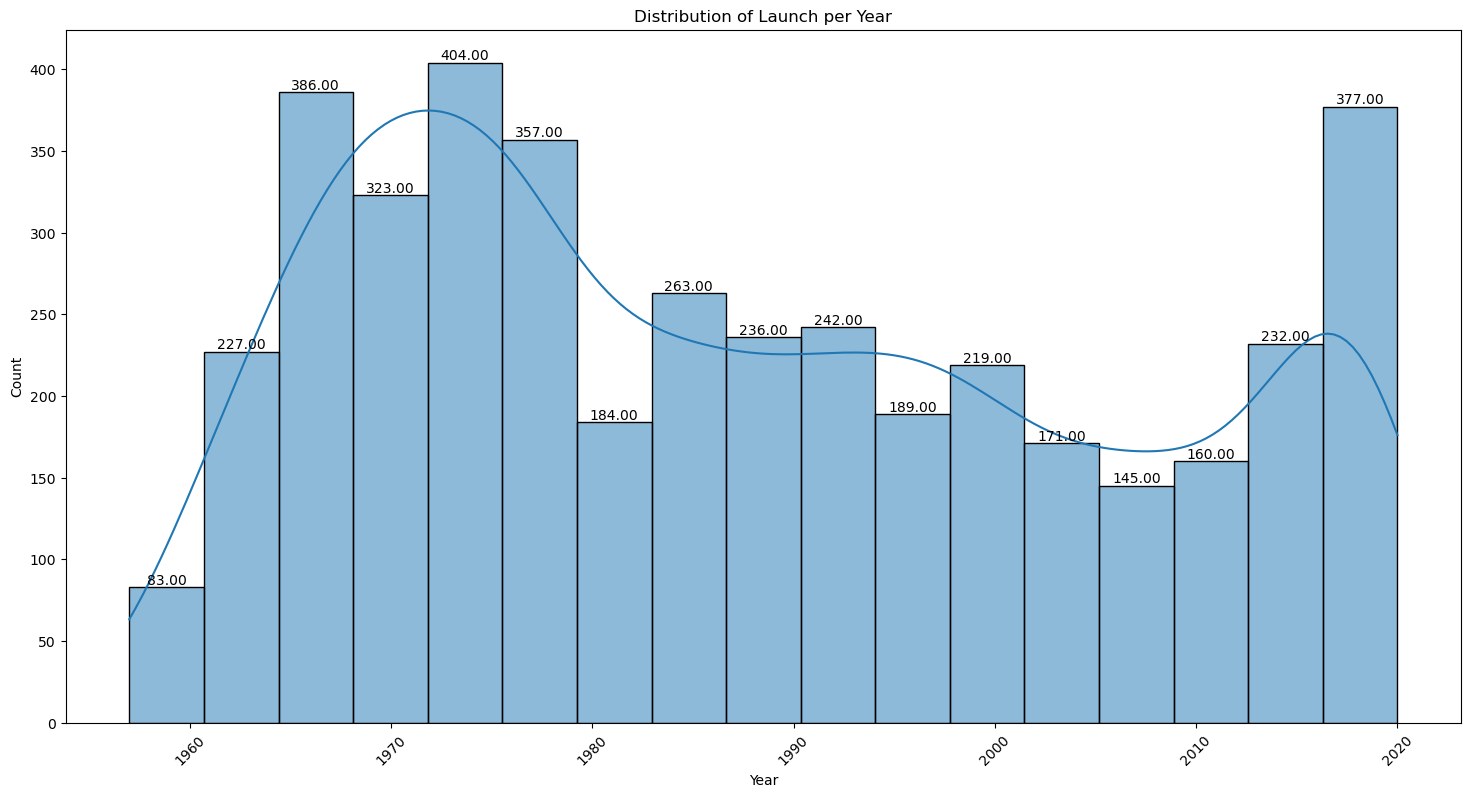

In [27]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.histplot(x=df_data['Date'].dt.year.sort_values(),ax=ax, palette="Set2", kde=True)
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Distribution of Launch per Year")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [28]:
df = df_data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Date'])
df_months = df.groupby(df['Date'].dt.month).size().reset_index(name='Count')
df_months.columns = ['Month', 'Count']
df_months=df_months.sort_values('Count', ascending=False)
df_months=df_months[:3]
df_months['monthName'] = df_months['Month'].apply(lambda x: calendar.month_name[x])

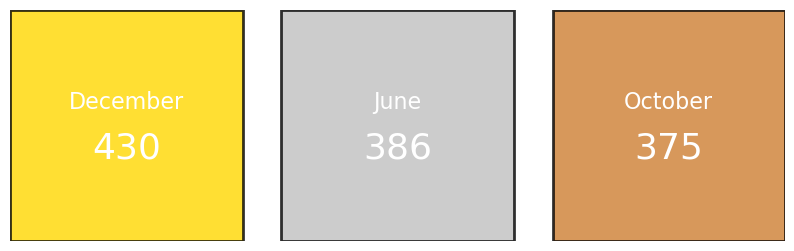

In [29]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("off")  

cards = [
    {"label": df_months.iloc[0]['monthName'], "value": df_months.iloc[0]['Count'], "color": "#FFD700"},
    {"label": df_months.iloc[1]['monthName'], "value": df_months.iloc[1]['Count'], "color": "#C0C0C0"},
    {"label": df_months.iloc[2]['monthName'], "value": df_months.iloc[2]['Count'], "color": "#CD7F32"},
]
for i, card in enumerate(cards):
    ax.add_patch(plt.Rectangle((i*3.5, 0), 3, 2, color=card["color"], alpha=0.8, ec="black", lw=2))
    ax.text(i*3.5 + 1.5, 1.2, card["label"], ha="center", va="center", fontsize=16, color="white")
    ax.text(i*3.5 + 1.5, 0.8, card["value"], ha="center", va="center", fontsize=26, color="white")

plt.xlim(0, 10)
plt.ylim(0, 2)
plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [30]:
dates_data = df_data.groupby(df_data['Date'].dt.month).size().reset_index(name='Count')
dates_data['Date'] = dates_data['Date'].apply(lambda x: pd.to_datetime(f'2021-{int(x):02d}-01').strftime('%B'))
min_count = dates_data['Count'].min()
max_count = dates_data['Count'].max()

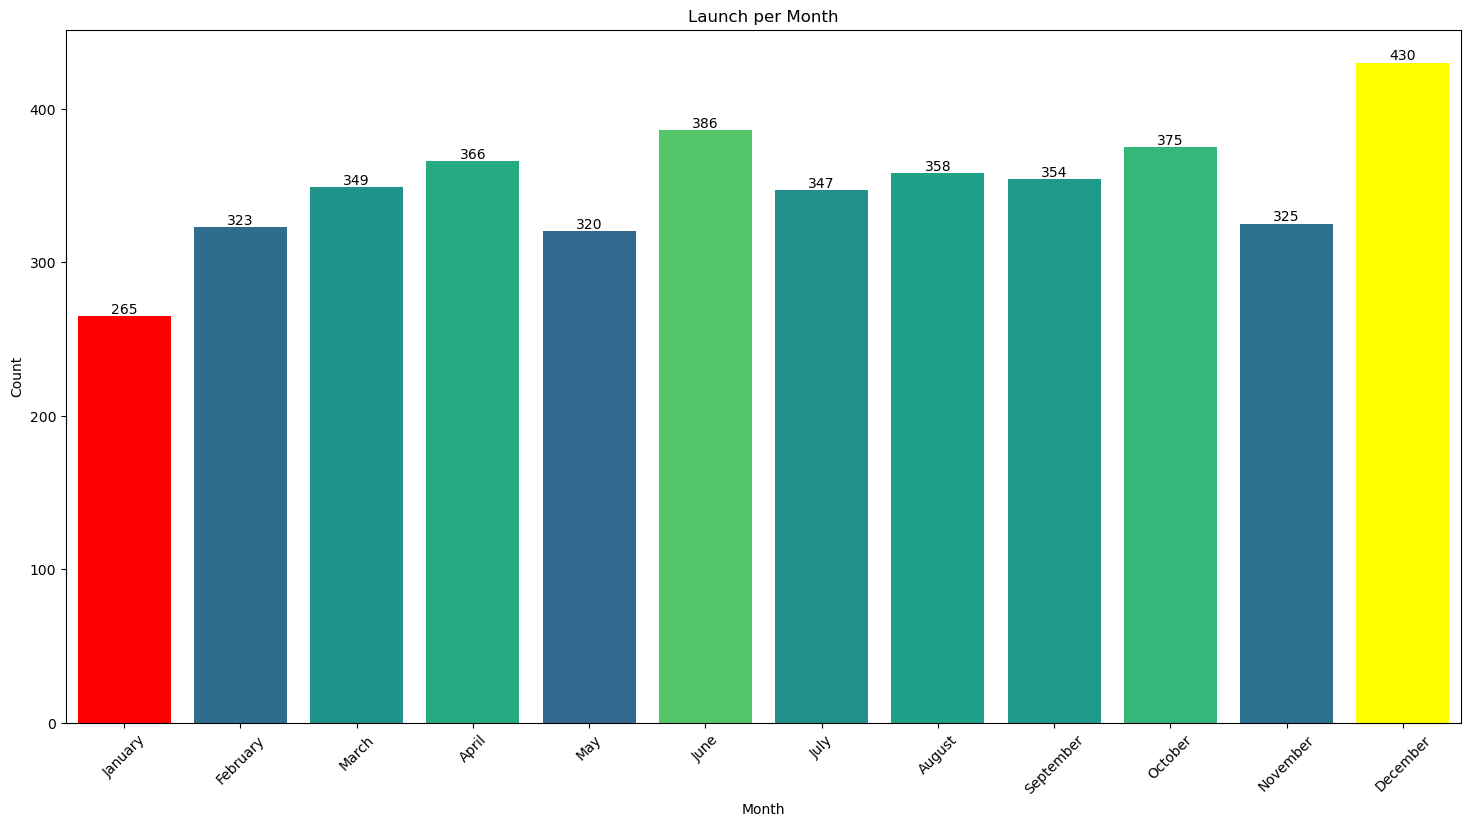

In [31]:
fig, ax = plt.subplots(figsize=(18, 9))

sns.barplot(data=dates_data, x='Date', y='Count',ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.set_title("Launch per Month")
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    if height == min_count:
        p.set_facecolor('red')  
    elif height == max_count:
        p.set_facecolor('yellow')  
    else:
        p.set_facecolor(plt.cm.viridis((height - min_count) / (max_count - min_count)))

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

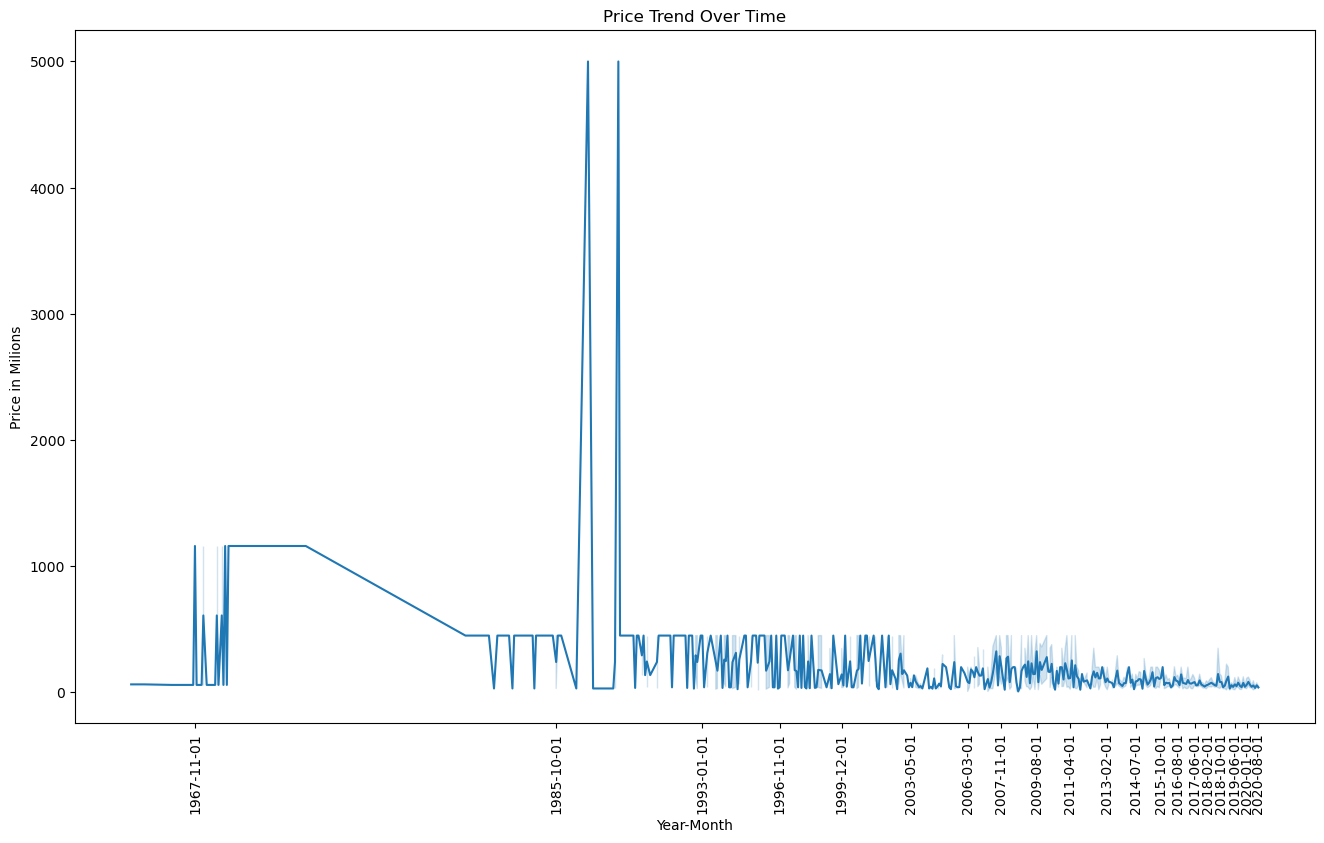

In [32]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

dates_data = df_data.dropna(subset=['Price'])

dates_data['Year_Month'] = dates_data['Date'].dt.to_period('M').dt.to_timestamp()

fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(x=dates_data['Year_Month'], y=dates_data['Price'], ax=ax)

ax.set_xlabel("Year-Month")
ax.set_ylabel("Price in Milions")
ax.set_title("Price Trend Over Time")

ax.set_xticks(dates_data['Year_Month'][::50])

plt.xticks(rotation=90)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [33]:
#select top 10 organisation by Launching
df = df_data.groupby('Organisation').size().reset_index(name='Count').sort_values('Count', ascending=False)
df_top10 = df.iloc[:10]['Organisation']
#Select rows including this organisations
org_df = df_data[df_data['Organisation'].isin(df_top10)].loc[:, ['Organisation', 'Date']]
org_df['Date'] = pd.to_datetime(org_df['Date'], errors='coerce')
org_df = org_df.sort_values(by=['Organisation', 'Date'])
org_df['Count'] = org_df.groupby('Organisation').cumcount() + 1

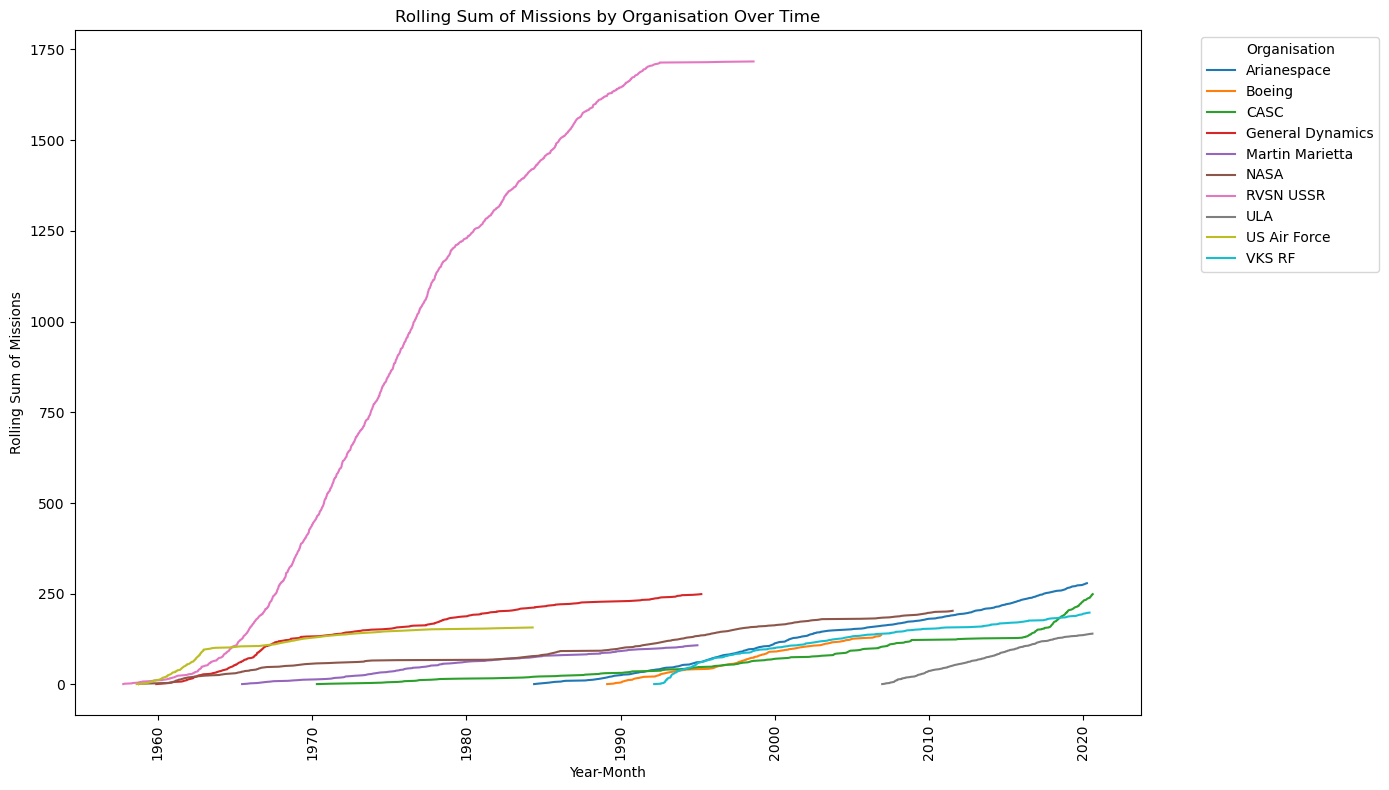

In [34]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=org_df, x='Date', y='Count', hue='Organisation')

plt.xticks(rotation=90) 
plt.xlabel("Year-Month")
plt.ylabel("Rolling Sum of Missions")
plt.title("Rolling Sum of Missions by Organisation Over Time")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc='upper left') 


plt.tight_layout() 
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [35]:
df_coldwar = df_data[(df_data['Date'].dt.year >= 1900) & (df_data['Date'].dt.year <= 1991)]


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [36]:
df_coldwar_filtered = df_coldwar[(df_coldwar['Country'] == ' USA') | (df_coldwar['Country'] == ' Russian Federation') | (df_coldwar['Country'] == ' Kazakhstan')]
df_coldwar_filtered=df_coldwar_filtered.replace(' Kazakhstan', ' Russian Federation')
rocket_status_counts = df_coldwar_filtered.Country.value_counts()


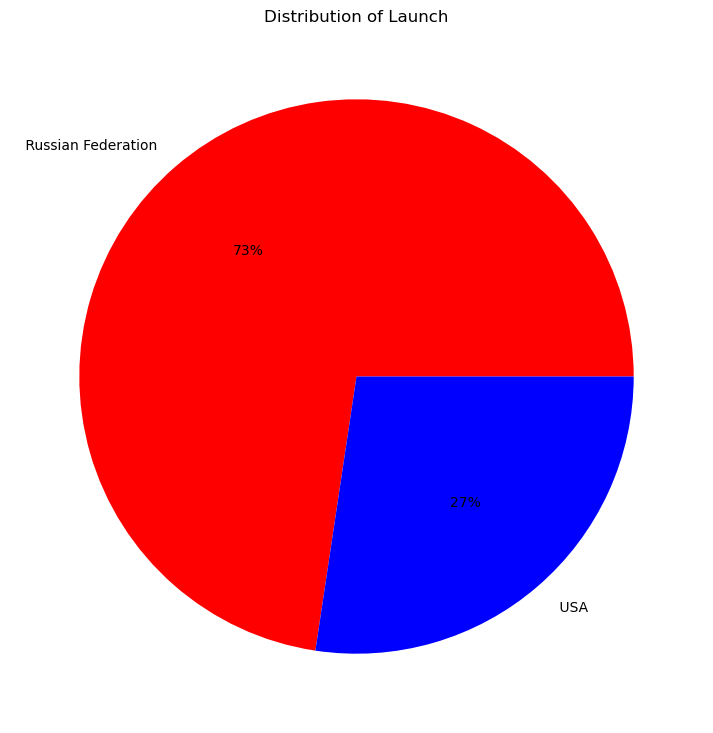

In [37]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.pie(rocket_status_counts, labels=rocket_status_counts.index, autopct='%.0f%%', colors=['red', 'blue'])
ax.set_title("Distribution of Launch")
plt.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [38]:
df_coldwar_filtered['Date'] = pd.to_datetime(df_coldwar_filtered['Date'], errors='coerce')
df_coldwar_filtered['Year'] = df_coldwar_filtered['Date'].dt.year
df_coldwar_filtered = df_coldwar_filtered.sort_values(by=['Country', 'Date'])
df_coldwar_filtered['Count'] = df_coldwar_filtered.groupby('Country').cumcount() + 1

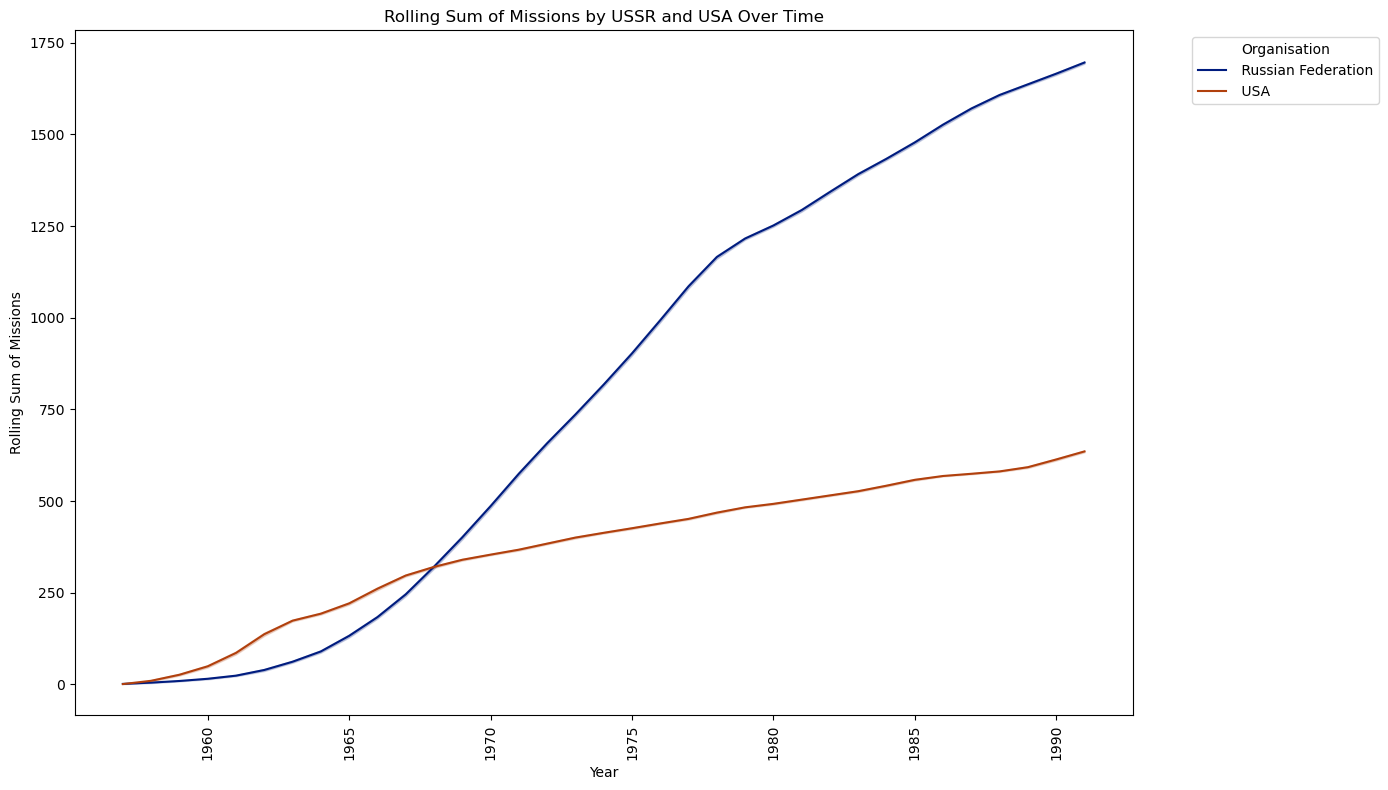

In [39]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=df_coldwar_filtered, x='Year', y='Count', hue='Country', palette='dark')

plt.xticks(rotation=90) 
plt.xlabel("Year")
plt.ylabel("Rolling Sum of Missions")
plt.title("Rolling Sum of Missions by USSR and USA Over Time")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc='upper left') 


plt.tight_layout() 
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [40]:
df_coldwar_filtered=df_coldwar_filtered.drop(['Count'],axis=1)

In [41]:
df = df_coldwar_filtered[df_coldwar_filtered['Mission_Status']=='Failure']
df['Count']=df.groupby('Country').cumcount() + 1

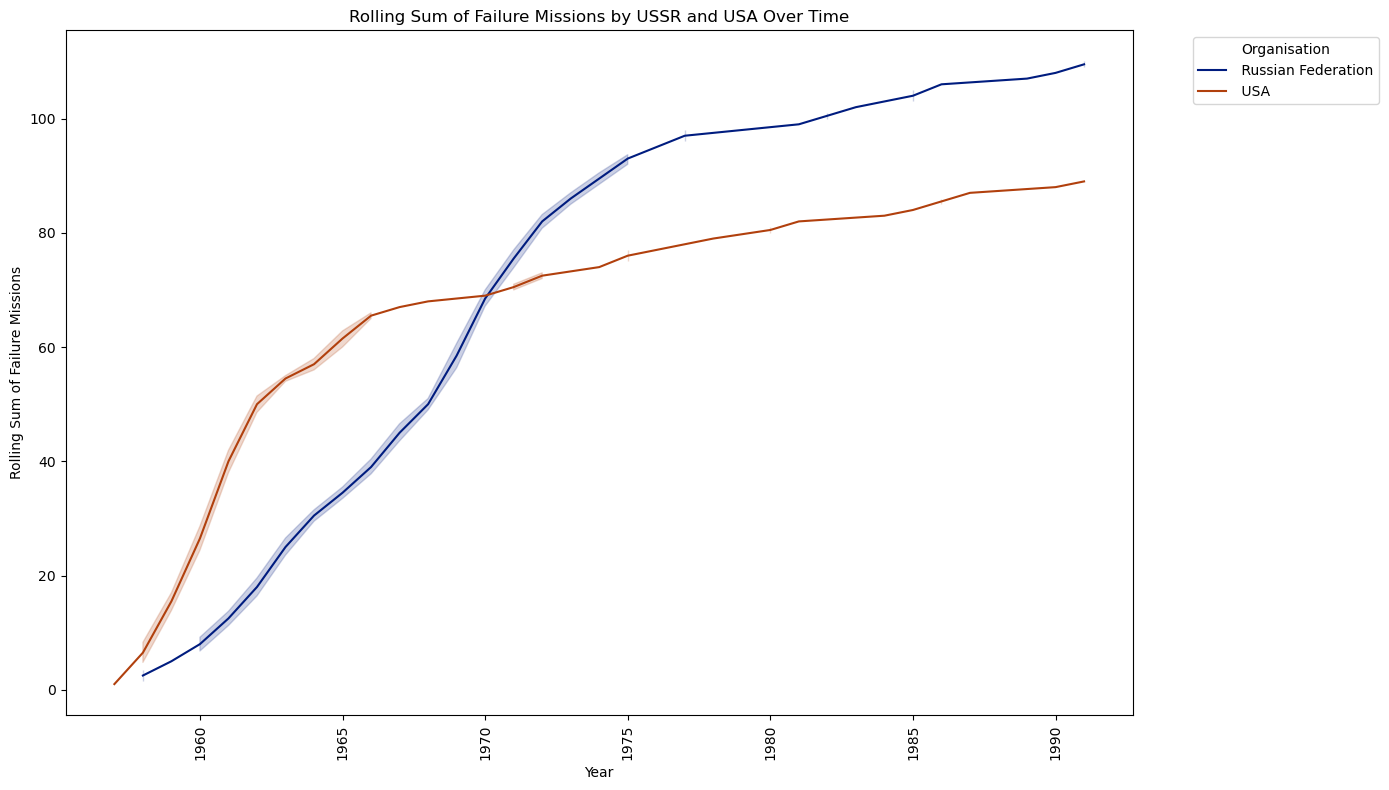

In [42]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='Year', y='Count', hue='Country', palette='dark')

plt.xticks(rotation=90) 
plt.xlabel("Year")
plt.ylabel("Rolling Sum of Failure Missions")
plt.title("Rolling Sum of Failure Missions by USSR and USA Over Time")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc='upper left') 


plt.tight_layout() 
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

<Figure size 1400x800 with 0 Axes>

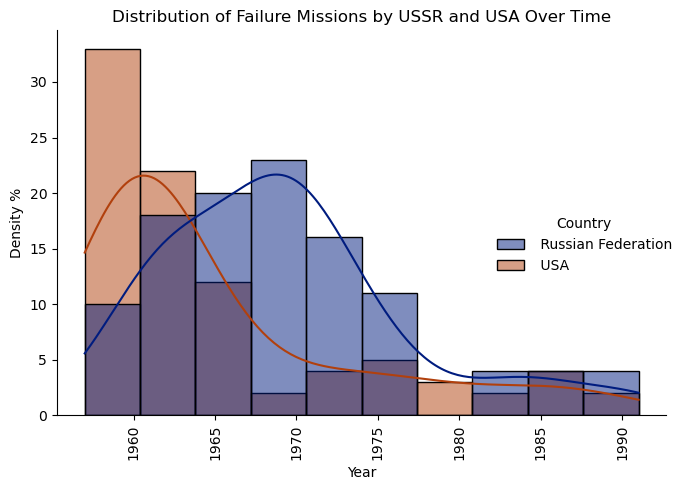

In [43]:
plt.figure(figsize=(14, 8))

sns.displot(data=df, x='Year', palette='dark', hue='Country', kde=True)

plt.xticks(rotation=90) 
plt.xlabel("Year")
plt.ylabel("Density %")
plt.title("Distribution of Failure Missions by USSR and USA Over Time")

plt.tight_layout() 
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [45]:
dft=df_data
dft['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
dft['Year'] = dft['Date'].dt.year
dft['Year'] = dft['Year'].astype('Int64')
dft = dft.sort_values(by=['Date', 'Country'])
dft['Count'] = dft.groupby('Country').cumcount() + 1
dft['Max_Count_by_Year'] = dft.groupby('Year')['Count'].transform('max')
dft=dft[dft['Count'] == dft['Max_Count_by_Year']]


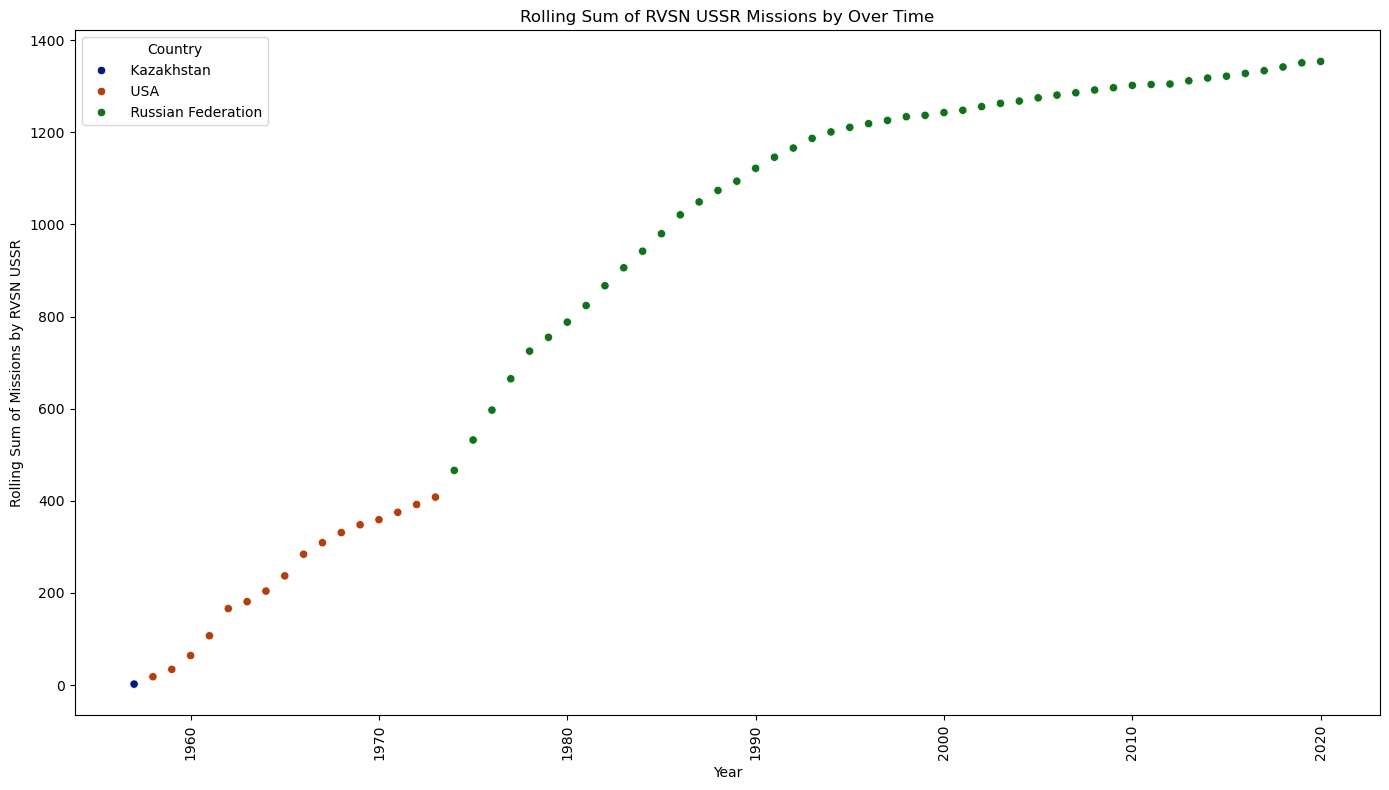

In [46]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=dft, x='Year', y='Count', palette='dark', hue='Country')

plt.xticks(rotation=90) 
plt.xlabel("Year")
plt.ylabel("Rolling Sum of Missions by RVSN USSR")
plt.title("Rolling Sum of RVSN USSR Missions by Over Time")


plt.tight_layout() 
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [47]:
df=df_data[df_data.Organisation == 'RVSN USSR']
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Year'] = df['Year'].astype('Int64')
df['Count']=df.groupby('Year').cumcount() + 1


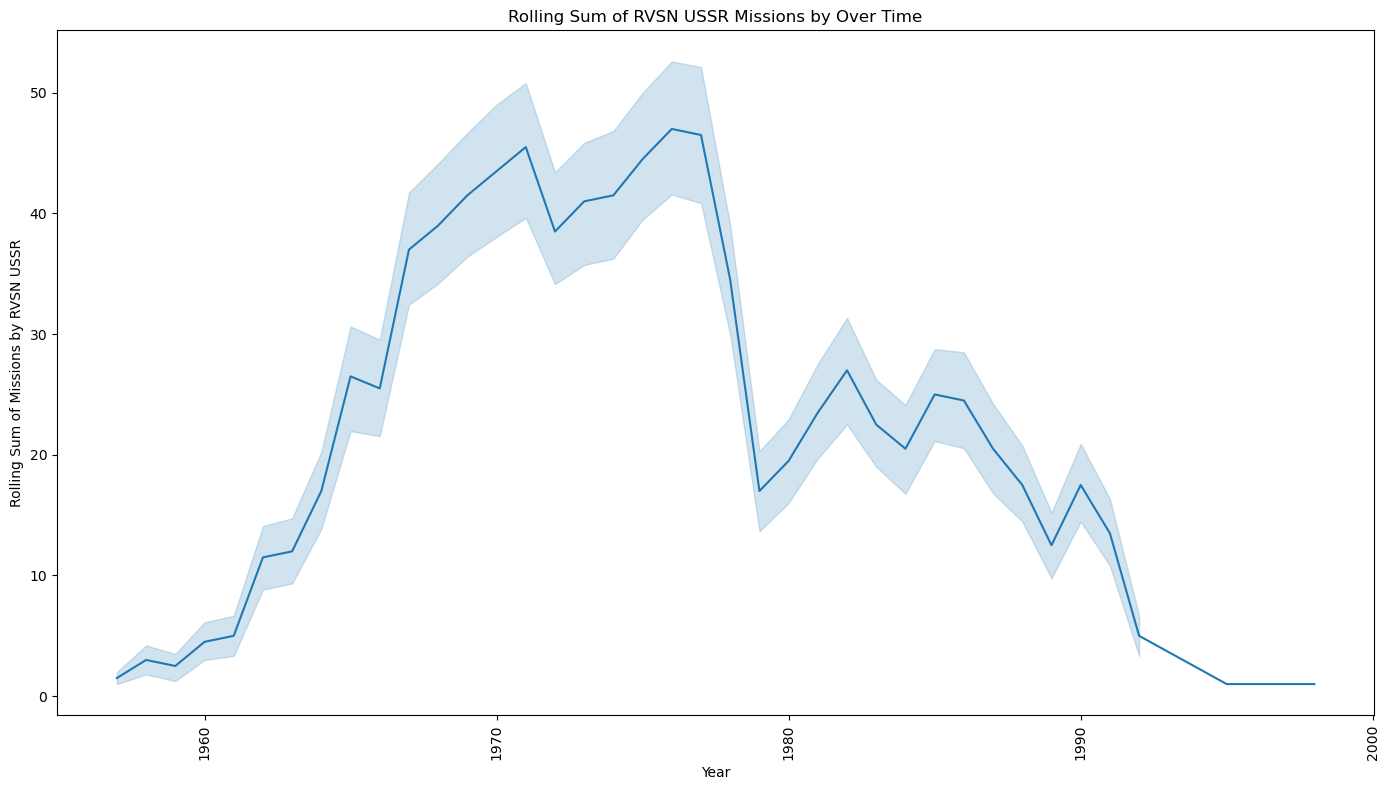

In [48]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='Year', y='Count', palette='dark')

plt.xticks(rotation=90) 
plt.xlabel("Year")
plt.ylabel("Rolling Sum of Missions by RVSN USSR")
plt.title("Rolling Sum of RVSN USSR Missions by Over Time")


plt.tight_layout() 
plt.show()

In [49]:
df=df_data[df_data.Organisation == 'Arianespace']
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Year'] = df['Year'].astype('Int64')
df['Count']=df.groupby('Year').cumcount() + 1


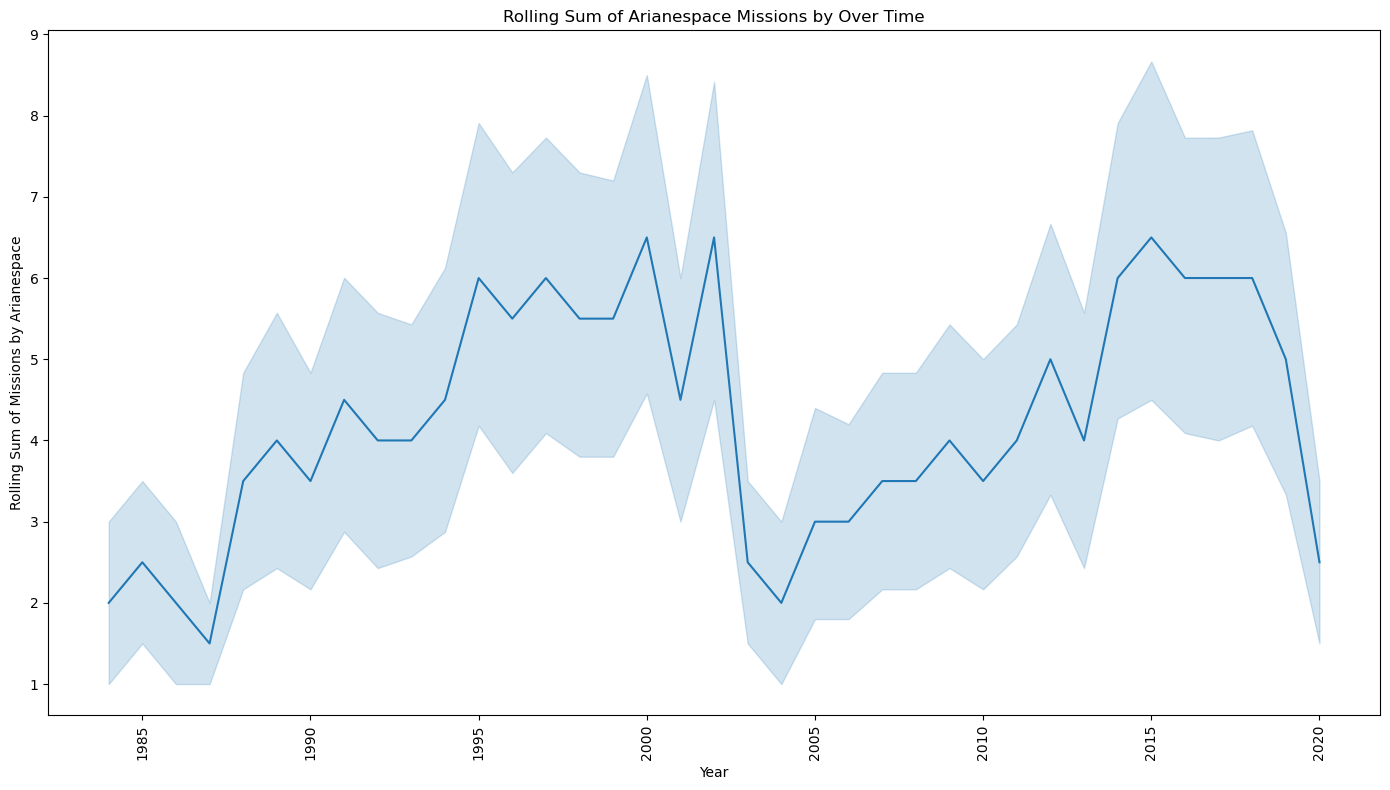

In [50]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=df, x='Year', y='Count', palette='dark')

plt.xticks(rotation=90) 
plt.xlabel("Year")
plt.ylabel("Rolling Sum of Missions by Arianespace")
plt.title("Rolling Sum of Arianespace Missions by Over Time")

plt.tight_layout() 
plt.show()